# Titanic - data analysis
👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place.
<a href="https://www.kaggle.com/c/titanic">Titanic kaggle problem</a>

## Package installation and virtual environment
Command to create virtual enviroment:
```
python -m venv env
```

Command to activate virtual enviroment (Windows 11):
```
.\env\Scripts\activate
```

Command to install packages:
```
pip install jupyter numpy pandas scikit-learn matplotlib seaborn xgboost
```

## Import libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## Load and describe training data

In [19]:
df_train = pd.read_csv("./csv/train.csv", index_col='PassengerId')
print(df_train.shape)
df_train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data features:
1. **PassengerId** (numerical discrete): *unique identifier for the passenger;*
2. **Survived** (categorical binary): *survival, 0 = No, 1 = Yes;*
3. **Pclass** (categorical): *ticket class;*
4. **Name** (categorical): *name of passenger*;*
5. **Sex** (categorical binary): *sex, male or female;*
6. **Age** (numerical discrete): *age in years;*
7. **SibSp** (numerical discrete): *number of siblings/spouses on the titanic;*
8. **Parch** (numerical discrete): *number of parents/children on the titanic;*
9. **Ticket** (categorical): *ticket number;*
10. **Fare** (numerical continous): *fee paid by a passenger for use;*
11. **Cabin** (categorical): *cabin number;*
12. **Embarked** (categorical): *port of embarkation;*

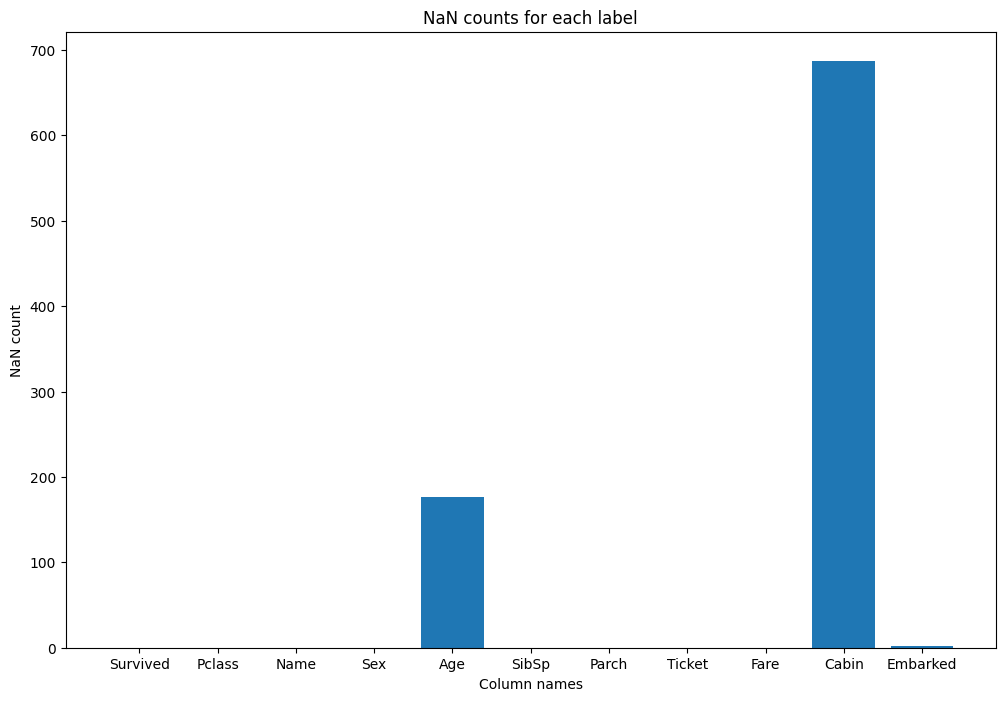

In [20]:
# Draw bars evenly spaced
plt.figure(figsize=(12, 8))
plt.bar(df_train.columns, df_train.isna().sum())
plt.title("NaN counts for each label")
plt.ylabel("NaN count")
plt.xlabel("Column names")
plt.show()

In [21]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data analysis

### Conclusion from the NaNs chart
We will fill in NaNs of the Age by using median and we will drop cabin column that has over 80% of NaNs as its values.

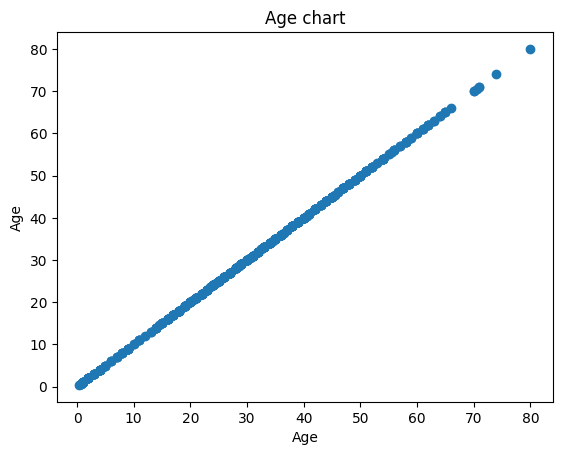

In [22]:
# Draw age = f(age)
plt.scatter(df_train["Age"], df_train["Age"])
plt.title("Age chart")
plt.xlabel("Age")
plt.ylabel("Age")
plt.show()

### How does age and sex affect chances of survival?

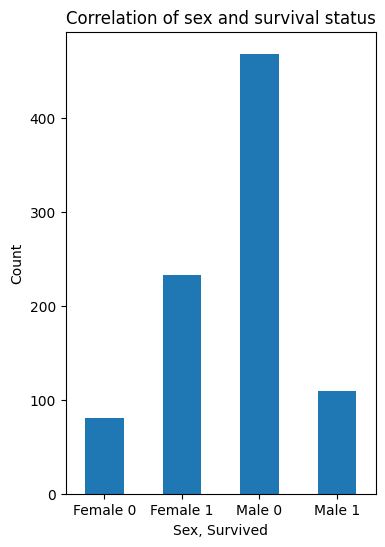

In [23]:
plt.figure(figsize=(4, 6))
df_train.groupby(["Sex", "Survived"]).size().plot.bar()

plt.xticks(
    ticks=range(4),
    labels=["Female 0", "Female 1", "Male 0", "Male 1"],
    rotation=0
)

plt.title("Correlation of sex and survival status")
plt.xlabel("Sex, Survived")
plt.ylabel("Count")
plt.show()

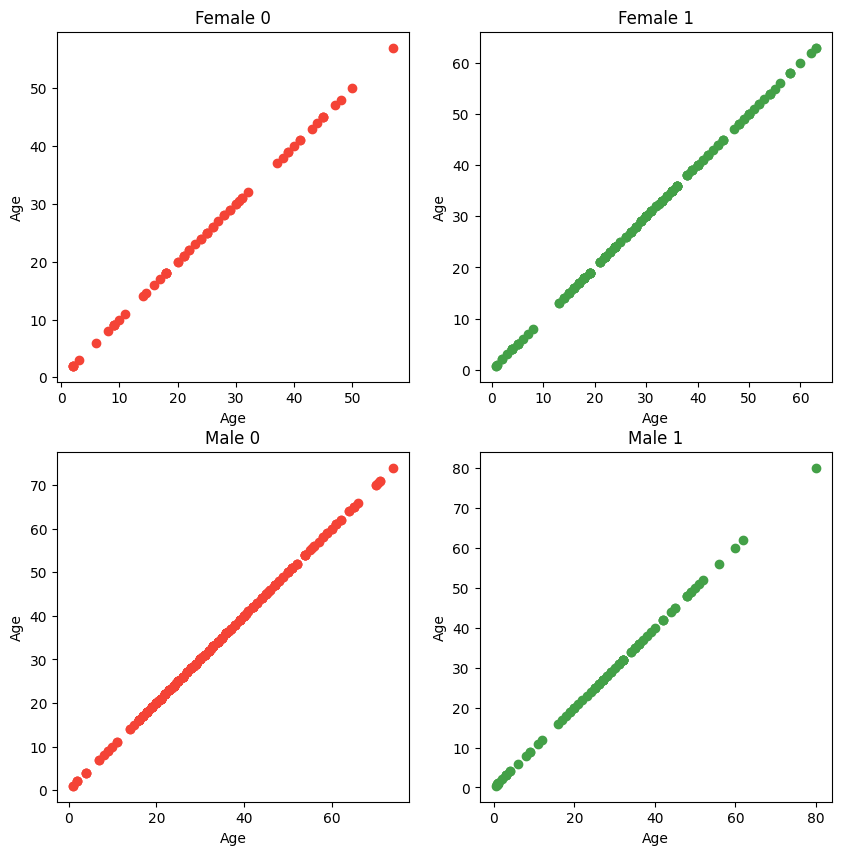

In [24]:
# Filter out data
female_0 = df_train[(df_train["Sex"] == "female") & (df_train["Survived"] == 0)]["Age"]
female_1 = df_train[(df_train["Sex"] == "female") & (df_train["Survived"] == 1)]["Age"]
male_0 = df_train[(df_train["Sex"] == "male") & (df_train["Survived"] == 0)]["Age"]
male_1 = df_train[(df_train["Sex"] == "male") & (df_train["Survived"] == 1)]["Age"]

# Draw graphs
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].set_title("Female 0")
axs[0, 0].scatter(female_0, female_0, c="#F44336")
axs[0, 0].set_xlabel("Age")
axs[0, 0].set_ylabel("Age")

axs[0, 1].set_title("Female 1")
axs[0, 1].scatter(female_1, female_1, c="#43A047")
axs[0, 1].set_xlabel("Age")
axs[0, 1].set_ylabel("Age")

axs[1, 0].set_title("Male 0")
axs[1, 0].scatter(male_0, male_0, c="#F44336")
axs[1, 0].set_xlabel("Age")
axs[1, 0].set_ylabel("Age")

axs[1, 1].set_title("Male 1")
axs[1, 1].scatter(male_1, male_1, c="#43A047")
axs[1, 1].set_xlabel("Age")
axs[1, 1].set_ylabel("Age")

plt.show()

As we can see above age and sex play major role in estimating the survival of the passenger. Most of the survivors are women and sacrafices are men.

### How do pclass and fare affect the survival stats?

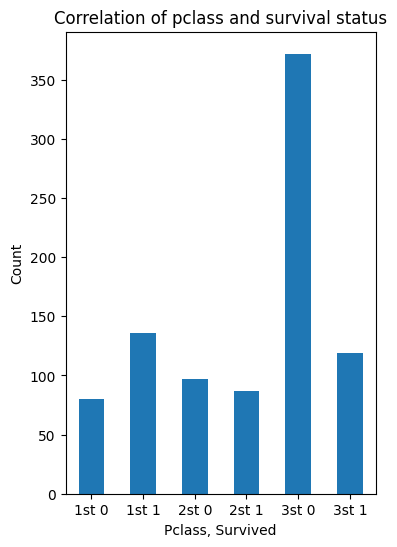

In [25]:
plt.figure(figsize=(4, 6))
df_train.groupby(["Pclass", "Survived"]).size().plot.bar()

plt.xticks(
    ticks=range(6),
    labels=["1st 0", "1st 1", "2st 0", "2st 1", "3st 0", "3st 1"],
    rotation=0
)

plt.title("Correlation of pclass and survival status")
plt.xlabel("Pclass, Survived")
plt.ylabel("Count")
plt.show()

We can easily say that pclass has a tremendous impact onto the survival status of the survivors.

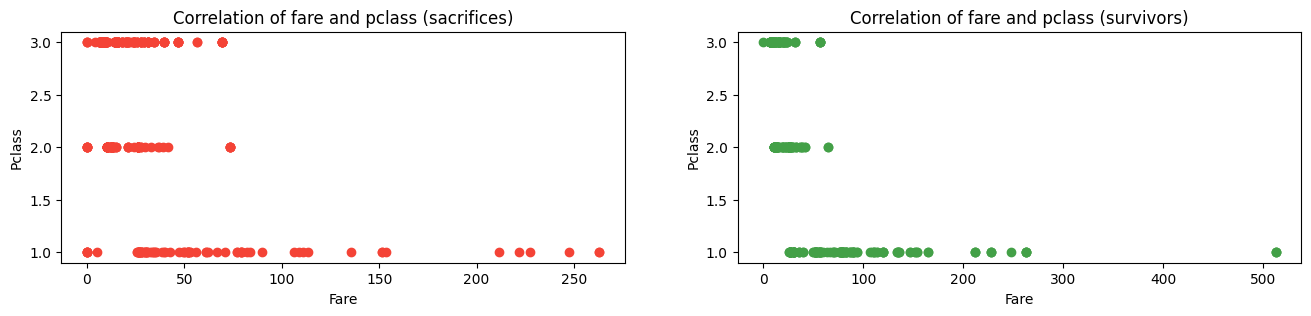

In [26]:
# Filter out data
fare_0_1st = df_train[(df_train["Survived"] == 0) & (df_train["Pclass"] == 1)][["Fare", "Pclass"]]
fare_1_1st = df_train[(df_train["Survived"] == 1) & (df_train["Pclass"] == 1)][["Fare", "Pclass"]]

fare_0_2st = df_train[(df_train["Survived"] == 0) & (df_train["Pclass"] == 2)][["Fare", "Pclass"]]
fare_1_2st = df_train[(df_train["Survived"] == 1) & (df_train["Pclass"] == 2)][["Fare", "Pclass"]]

fare_0_3st = df_train[(df_train["Survived"] == 0) & (df_train["Pclass"] == 3)][["Fare", "Pclass"]]
fare_1_3st = df_train[(df_train["Survived"] == 1) & (df_train["Pclass"] == 3)][["Fare", "Pclass"]]

# Plot data
fig, axs = plt.subplots(1, 2, figsize=(16, 3))

axs[0].scatter(fare_0_1st["Fare"], fare_0_1st["Pclass"], c="#F44336")
axs[0].scatter(fare_0_2st["Fare"], fare_0_2st["Pclass"], c="#F44336")
axs[0].scatter(fare_0_3st["Fare"], fare_0_3st["Pclass"], c="#F44336")
axs[0].set_xlabel("Fare")
axs[0].set_ylabel("Pclass")
axs[0].set_title("Correlation of fare and pclass (sacrifices)")

axs[1].scatter(fare_1_1st["Fare"], fare_1_1st["Pclass"], c="#43A047")
axs[1].scatter(fare_1_2st["Fare"], fare_1_2st["Pclass"], c="#43A047")
axs[1].scatter(fare_1_3st["Fare"], fare_1_3st["Pclass"], c="#43A047")
axs[1].set_xlabel("Fare")
axs[1].set_ylabel("Pclass")
axs[1].set_title("Correlation of fare and pclass (survivors)")

plt.show()

Fare doesn't have as much impact as the pclass onto the survival status of the passenger.

### How does sibsp and parch affect survival status?

Text(0.5, 1.0, 'Survivors correlation of parch and sibsp')

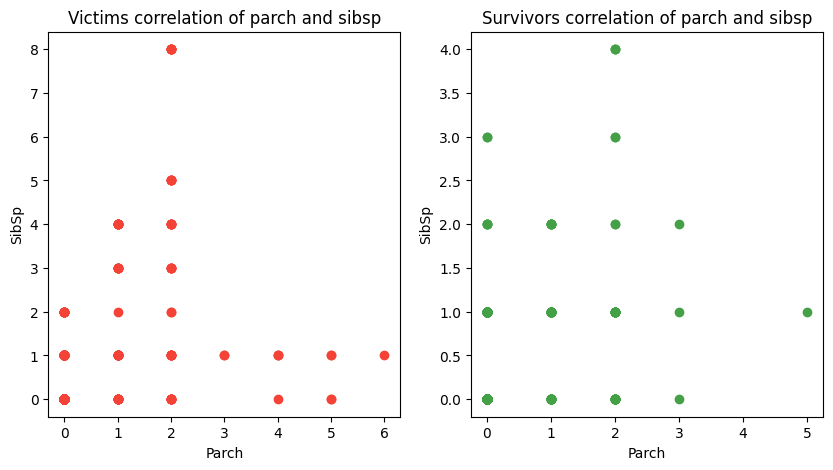

In [29]:
# Filter out data
victims = df_train[df_train["Survived"] == 0][["Parch", "SibSp"]]
survivors = df_train[df_train["Survived"] == 1][["Parch", "SibSp"]]

# Plot out graph
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(victims["Parch"], victims["SibSp"], c="#F44336")
axs[0].set_xlabel("Parch")
axs[0].set_ylabel("SibSp")
axs[0].set_title("Victims correlation of parch and sibsp")

axs[1].scatter(survivors["Parch"], survivors["SibSp"], c="#43A047")
axs[1].set_xlabel("Parch")
axs[1].set_ylabel("SibSp")
axs[1].set_title("Survivors correlation of parch and sibsp")

### How does embarked affect survival status?

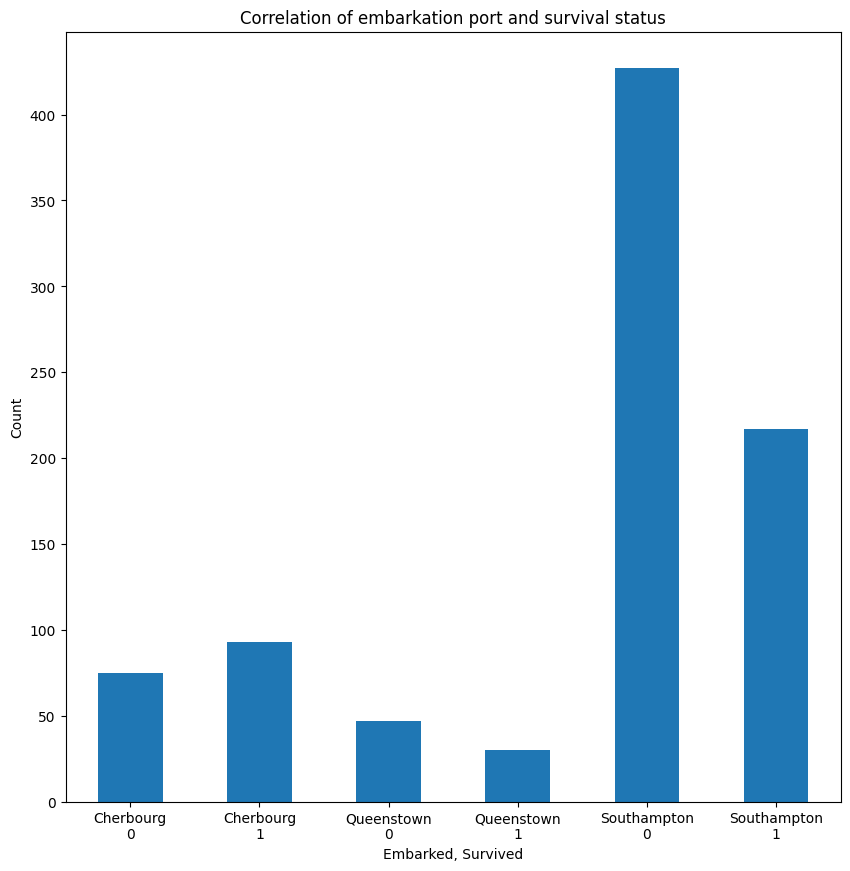

In [38]:
plt.figure(figsize=(10, 10))
# Filter out data
embarked_grouped = df_train.groupby(["Embarked", "Survived"]).size().plot.bar()

plt.xticks(
    ticks=range(6),
    labels=["Cherbourg\n0", "Cherbourg\n1", "Queenstown\n0", "Queenstown\n1", "Southampton\n0", "Southampton\n1"],
    rotation=0
)

plt.title("Correlation of embarkation port and survival status")
plt.ylabel("Count")
plt.xlabel("Embarked, Survived")
plt.show()

It does look weird that port of embarkation has an impact onto the survival status. It might seem to have some relation with another feature or is misleading. We will test training model with it and without.